In [43]:
import h5py
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt
import collections
from pylab import meshgrid
import os


%matplotlib inline


        
class FIELD(Enum):
        ELECTRIC = [1,['0_2'],[r'$E_z$']]
        CURRENT = [1,[ '1_2'],[ r'$J_z$']]
        MAGNETIC = [1,[ '8_1'],[ r'$B_y$']]
        



                    
def loadData(fileName):           
        f = h5py.File(fileName, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        for fld in UFIELD:
                VAR0_name = 'vars/'+fld.value[1][0]
                SHAPE = f[VAR0_name].shape            
                Lx=SHAPE[0]
                Ly=SHAPE[1]
                Lz=SHAPE[2]
                data = np.zeros([Lx, Ly, Lz,  6])
                idx = 0
                for field in fld.value[1]:
                    VAR_name = 'vars/'+field
                    data[...,idx] = f[VAR_name][...]
                    idx += 1
                    allData[fld] = data                   
        f.close()
        return allData
        
        
def loadVar(fileName, fld):           
        f = h5py.File(fileName, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz, len(fld.value[1])])
        idx = 0
        for field in fld.value[1]:
            VAR_name = 'vars/'+field
            data[...,idx] = f[VAR_name]
            idx += 1
            
        f.close()
        return data
    
def loadVarComp(fileName, fld, comp):           
        f = h5py.File(fileName, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz])
        VAR_name = 'vars/'+fld.value[1][comp]
        data[...] = f[VAR_name]
            
        f.close()
        return data
    

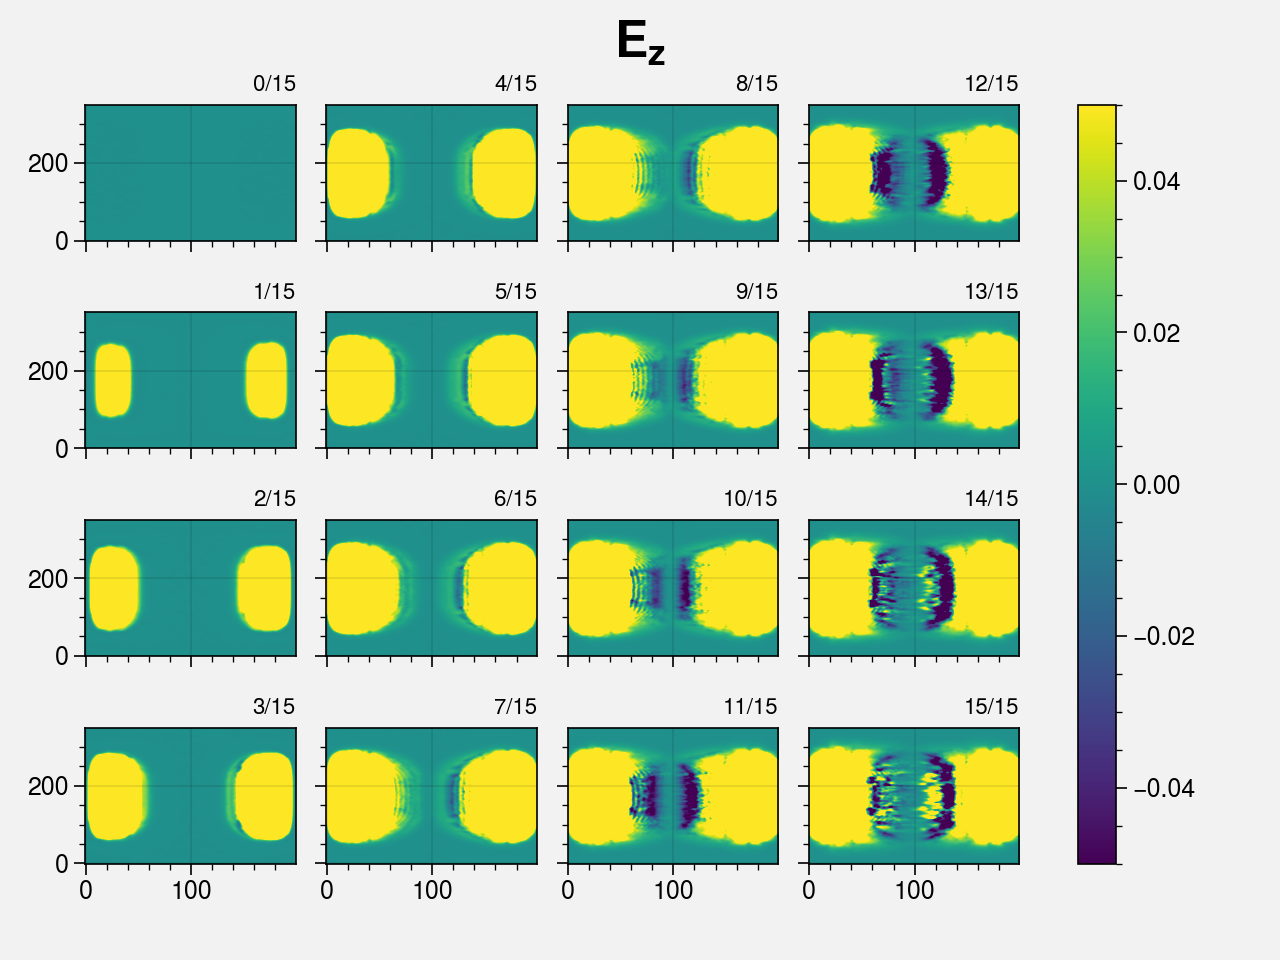

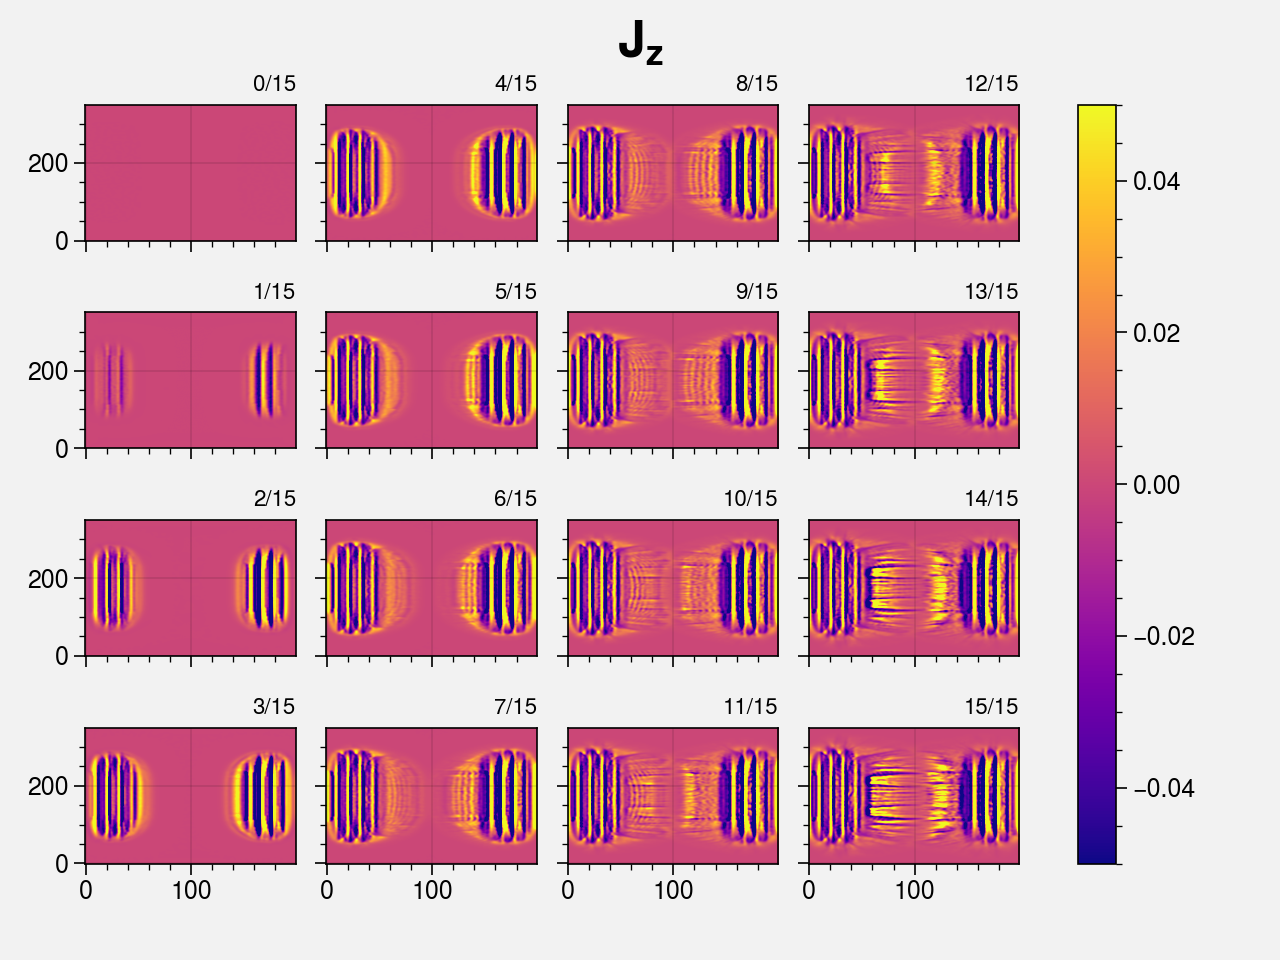

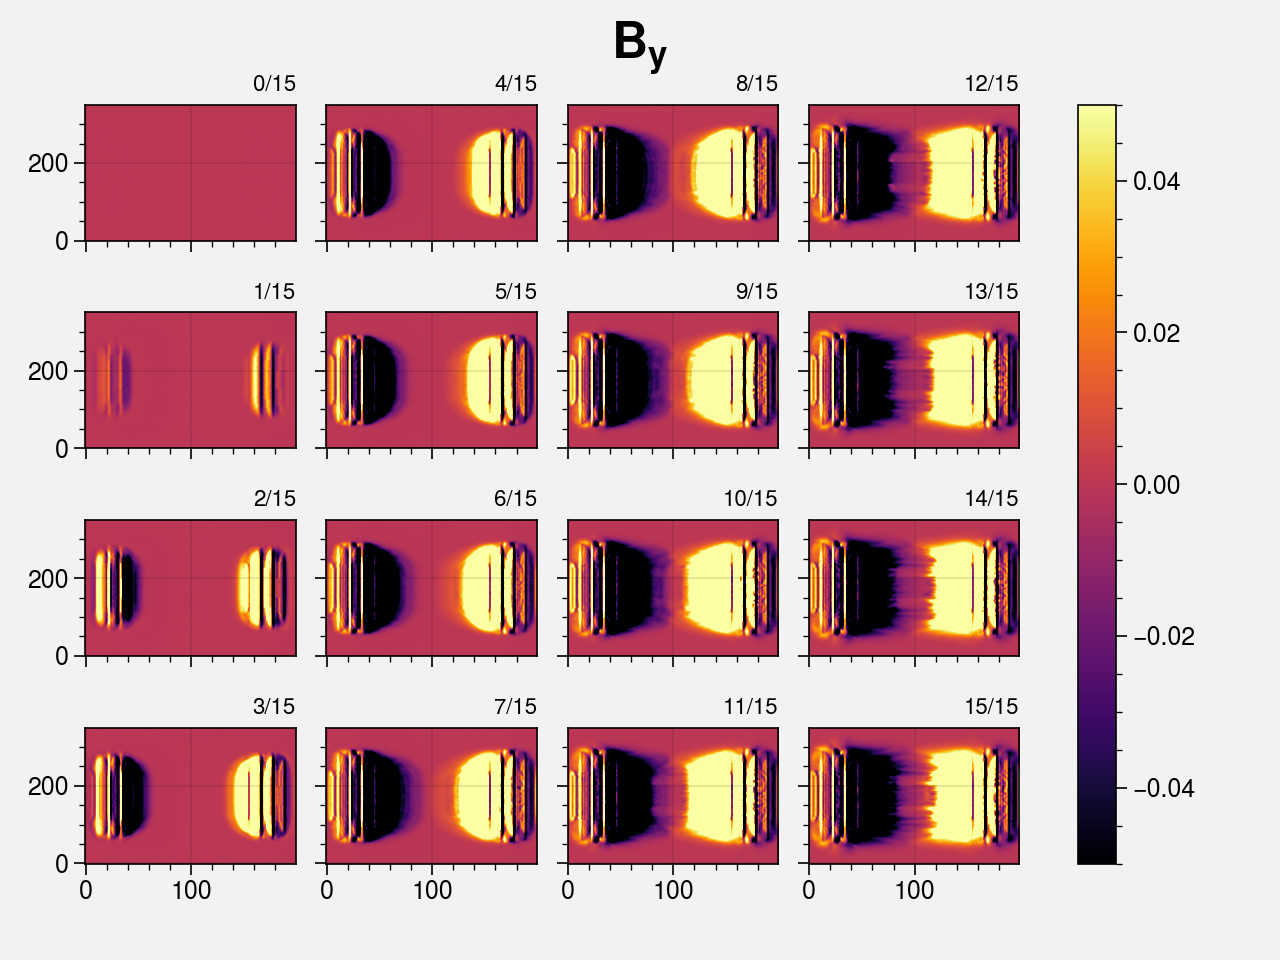

In [45]:
col=['viridis', 'plasma', 'inferno']

z=20
i=0

for fld in FIELD:
    fig,axis = plt.subplots(4, 4, sharex=True, sharey=True)
    title = fld.value[2][0]
    fig.suptitle( str(title) , fontsize=18)
    for field in fld.value[1]:
        for filename in os.listdir():
            if filename.endswith(".h5"):
                numfr = str(filename.split('.')[0].split('_')[2])
        
                data2Plt = loadVarComp(filename, fld, 0)
                [lx, ly, lz] = data2Plt.shape
                vmax = 0.05
                x=int(numfr)%4
                y=int((int(numfr)-x)/4)
                c=axis[x,y].imshow( np.transpose(data2Plt[...,z]),
                        origin = 'lower', vmin = -vmax, vmax = vmax,
                        interpolation='bicubic', cmap=col[i])
                axis[x,y].set_aspect('auto')
                axis[x,y].set_title(str(numfr)+'/15', loc='right', fontsize=8)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.colorbar(c, ax=axis)
    i+=1
    